In [215]:
%load_ext autoreload
%autoreload 2
import sys
import os
import glob
import numpy as np
import pandas as pd
sys.path.append("../../Code")
import utils
import preprocessing as pre

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
hosts = pd.read_csv('len_lang_restrict_hosts.csv', index_col=0)
guests = pd.read_csv('len_lang_restrict_guests.csv', index_col=0)
reviews = pd.read_csv('len_lang_restrict_reviews.csv', index_col=0)
listings = pd.read_csv('len_lang_restrict_listings.csv', index_col=0)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [217]:
len(reviews)

225484

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

In [219]:
host_review_count = reviews.groupby('recipient_id').count()[['id']].rename(columns={'id': 'num_of_reviews'})
count_table = utils.create_value_counts_table(host_review_count, 'num_of_reviews', 'num_of_guest_reviews')
count_table.head(10)

,num_of_guest_reviews,counts,%
0,1,1798,15.86
1,2,1152,10.16
2,3,809,7.14
3,4,648,5.72
4,5,520,4.59
5,6,433,3.82
6,7,386,3.40
7,8,330,2.91
8,9,286,2.52
9,10,255,2.25


   num_of_guest_reviews  counts      %
0                     1    1798  15.86
1                     2    1152  10.16
2                     3     809   7.14
3                     4     648   5.72
4                     5     520   4.59
5                     6     433   3.82
6                     7     386   3.40
7                     8     330   2.91
8                     9     286   2.52
9                    10     255   2.25


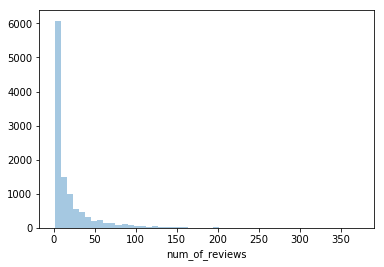

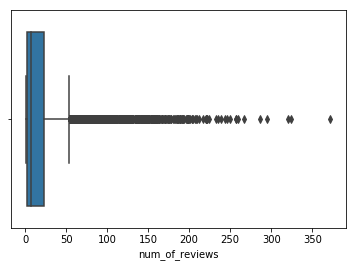

Average: 19.889212313663226
Min: 1
Max: 372
Variance: 979.6677119754755
Std deviation: 31.299643959244577


In [220]:
pre.show_reviews_per_person_dist(host_review_count, 'recipient_id')

In [221]:
pre.build_exclusion_table(host_review_count, reviews, listings, 1, 6)

,Exclusion(By # of reviews per host),Pre-exclusion,> 1,> 2,> 3,> 4,> 5
0,Hosts,11337,9539 (84.14%),8387 (73.98%),7578 (66.84%),6930 (61.13%),6410 (56.54%)
1,Reviews,225484,223686 (99.20%),221382 (98.18%),218955 (97.10%),216363 (95.95%),213763 (94.80%)
2,Guests,211498,209886 (99.24%),207844 (98.27%),205683 (97.25%),203355 (96.15%),201003 (95.04%)
3,Listings,11337,9539 (84.14%),8387 (73.98%),7578 (66.84%),6930 (61.13%),6410 (56.54%)


## Explanation (1) - looking at availibility - marked themselves as not available 

In [92]:
new_ids = host_review_count[host_review_count['num_of_reviews'] <2].index

In [99]:
low_review_listings = listings[listings['host_id'].isin(new_ids)]

In [196]:
listings['availability_365'].value_counts()

0      4670
1       123
3       108
365     106
2        86
4        84
5        80
6        76
10       71
154      71
7        63
8        62
15       54
13       54
14       53
16       49
11       49
89       48
12       47
338      47
9        45
34       45
25       44
30       44
17       43
62       43
31       43
22       42
88       42
18       39
       ... 
250       9
117       9
98        9
170       9
136       9
128       9
113       9
214       9
151       9
288       9
239       9
312       9
198       8
102       8
254       8
231       8
233       8
255       8
181       8
270       8
286       8
126       8
116       8
210       8
130       7
92        7
316       6
145       6
313       6
107       4
Name: availability_365, Length: 366, dtype: int64

In [101]:
left_ids = low_review_listings[low_review_listings['availability_365'] > 0]['host_id']

In [102]:
low_review_listings[low_review_listings['availability_365'] > 0]

,idListing,id,host_id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,street,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,market,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
115,251,53137,240360,"Quiet, sunny Midtown Manhattan apt.",NaN,"Sunny, 600-sq. foot one-bedroom apartment in Midtown (West) Manhattan. Downstairs laundry. Larg...","Sunny, 600-sq. foot one-bedroom apartment in Midtown (West) Manhattan. Downstairs laundry. Larg...",NaN,NaN,NaN,NaN,NaN,"No smoking. You must be quiet, clean, and responsible. Apartment should be left as received (cle...",https://a0.muscache.com/im/pictures/308493/4d941138_original.jpg?aki_policy=large,"New York, NY, United States",Hell's Kitchen,Manhattan,10036.0,New York,"New York, NY",US,40.762435,-73.992711,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Washer / Dryer"",""Pets live on this property"",Cat(s),""Buzzer/wireless int...",$195.00,NaN,NaN,$750.00,NaN,1,$0.00,5,730,0,0,0,123,1,60.0,NaN,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.01
344,732,231414,1184442,TURQUOISE: One-Bedroom Apt. in Soho,NaN,"Visit New York City! Situated in the beautiful, historic neighborhood of Soho, the location of t...","Visit New York City! Situated in the beautiful, historic neighborhood of Soho, the location of t...",NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/3207746/ddae74ec_original.jpg?aki_policy=large,"New York, NY, United States",SoHo,Manhattan,10012.0,New York,"New York, NY",US,40.725985,-74.001682,t,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,""Smoke detector""...",$270.00,NaN,NaN,NaN,$80.00,1,$0.00,5,30,0,10,10,266,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,t,f,moderate,f,f,0.02
424,917,274743,1436404,Charming furnished Studio-Loft,"This apartment is available for short/long term; 1 month to 10 months, more/less.The monthly ren...",Beautiful - Light - Safe - Quiet - Studio- Loft - 1 Full size bed - 1 Sofa full size convertible...,"This apartment is available for short/long term; 1 month to 10 months, more/less.The monthly ren...",NaN,"ABSOLUTELY NO SMOKING- During summer, AC is added separately-agreement signed.",NaN,NaN,NaN,"One time washing and cleaning fee applies of $60 in CASH ONLY, it is not included in the offer p...",https://a0.muscache.com/im/pictures/26156159/d30a2464_original.jpg?aki_policy=large,"New York, NY, United States",Upper East Side,Manhattan,10028.0,New York,"New York, NY",US,40.773680,-73.951981,t,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,Elevator,""Buzzer/wireless intercom"",Heat...",$110.00,$875.00,"$2,950.00","$2,000.00",$60.00,1,$0.00,15,300,0,0,22,297,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,0.02
521,1118,346579,1757016,NYC Lower East Side 1 BR + office,NaN,"My apartment on the Lower East Side is actually a 2br, but I use one room as an office space. It...","My apartment on the Lower East Side is actually a 2br, but I use one room as an office space. It...",NaN,NaN,NaN,NaN,NaN,No Smoking No Pets No Parties Please keep clean Please take off shoes :),https://a0.muscache.com/im/pictures/15822169/c295d8d5_original.jpg?aki_policy=large,"New York, NY, United States

In [82]:
import collections


In [95]:
counter = collections.Counter([h.split('/')[-1] for h in hosts[hosts['id'].isin(new_ids)]['since']])

In [96]:
print(counter)

Counter({'2015': 452, '2014': 360, '2016': 281, '2013': 273, '2012': 172, '2017': 170, '2018': 91, '2011': 86, '2010': 20, '2009': 4})


In [ ]:
Reasons for low number of reviews :
    - fairly new hosts - no 
    - host has not been invested in airbnb listing - marked as unavalable
    - response rate 
    - instant bookable 
    - rules
Ideas :
    Look at satisfaction scores for those with only few reviews 
    